# Data preprocessing

In [13]:
from PIL import Image
import PIL.ImageOps
from resizeimage import resizeimage
from glob import glob
from random import shuffle, seed
import numpy as np
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [14]:
#Resize images
def resize(path_to_image, width, height):
        """Resize the image and save it again.
        :param path_to_image: os.path
        :param width: int
        :param height: int
        :return: None
        """
        try:
            fd_img = open(path_to_image, 'rb')
            img = Image.open(fd_img)
            img = resizeimage.resize_cover(img, [int(width), int(height)])
            img.save(path_to_image, img.format)
            fd_img.close() 
        except:
            pass

In [15]:
men_files = glob("/Users/nhatpham/Downloads/Man's Clothing/*.JPEG")
women_files = glob("/Users/nhatpham/Downloads/Women_files/*.JPEG")
[resize(i,70,70) for i in men_files]
[resize(i,70,70) for i in women_files]


[]

In [16]:
#flatter images to numerical data (rbg values)
import cv2
def flatten(file):
    image = PIL.Image.open(file)
    width, height = image.size
    string_img = cv2.imread(file).reshape(1,width*height*3)
    return(string_img[0])

men_files = glob("/Users/nhatpham/Downloads/Man's Clothing/*.JPEG")
women_files = glob("/Users/nhatpham/Downloads/Woman's Clothing/*.JPEG")
raw_data = [[flatten(filename),'men'] for filename in men_files] + \
           [[flatten(filename),'women'] for filename in women_files]

In [17]:
np.array(raw_data)[:,0]

array([array([227, 181,  97, 202, 158,  75, 212, 169,  88, 206, 167,  89, 229,
       194, 121, 222, 177,  96, 188, 145,  64, 187, 148,  70, 179, 142,
        68, 205, 171, 101, 242, 202, 127, 205, 166,  91, 204, 169,  96,
       208, 175, 106, 250, 220, 155, 255, 219, 149, 212, 178, 108, 211,
       177, 111, 213, 182, 119, 255, 227, 167, 238, 206, 141, 195, 165,
       100, 193, 164, 103, 192, 165, 108, 226, 202, 148], dtype=uint8),
       array([244, 253, 255, 140, 149, 158,  91, 100, 109, 154, 163, 172, 244,
       253, 255, 210, 217, 226,  37,  47,  54,   0,   2,  11,   5,  15,
        22, 182, 191, 200, 218, 224, 231,  72,  81,  85,  79,  85,  92,
        71,  80,  84, 225, 233, 240, 235, 239, 244,  85,  92,  95,  40,
        44,  49,  96, 103, 106, 234, 240, 245, 251, 254, 255,  87,  92,
        93,   0,   0,   3,  98, 103, 104, 241, 246, 249], dtype=uint8),
       array([119, 128, 165, 104, 113, 150,  97, 109, 143,  85, 100, 132,  82,
        97, 129, 118, 127, 161, 118, 128, 1

In [18]:
#process data to obtain x and y values to train the classification models
data = np.array([cd for [cd,_y] in raw_data])
labels = np.array([_y for [cd,_y] in raw_data])
y = np.array([1 if label == 'men' else 0 for label in labels])

In [19]:
data

array([array([227, 181,  97, 202, 158,  75, 212, 169,  88, 206, 167,  89, 229,
       194, 121, 222, 177,  96, 188, 145,  64, 187, 148,  70, 179, 142,
        68, 205, 171, 101, 242, 202, 127, 205, 166,  91, 204, 169,  96,
       208, 175, 106, 250, 220, 155, 255, 219, 149, 212, 178, 108, 211,
       177, 111, 213, 182, 119, 255, 227, 167, 238, 206, 141, 195, 165,
       100, 193, 164, 103, 192, 165, 108, 226, 202, 148], dtype=uint8),
       array([244, 253, 255, 140, 149, 158,  91, 100, 109, 154, 163, 172, 244,
       253, 255, 210, 217, 226,  37,  47,  54,   0,   2,  11,   5,  15,
        22, 182, 191, 200, 218, 224, 231,  72,  81,  85,  79,  85,  92,
        71,  80,  84, 225, 233, 240, 235, 239, 244,  85,  92,  95,  40,
        44,  49,  96, 103, 106, 234, 240, 245, 251, 254, 255,  87,  92,
        93,   0,   0,   3,  98, 103, 104, 241, 246, 249], dtype=uint8),
       array([119, 128, 165, 104, 113, 150,  97, 109, 143,  85, 100, 132,  82,
        97, 129, 118, 127, 161, 118, 128, 1

In [ ]:
y

In [9]:
from sklearn import datasets, linear_model, metrics, model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, y, test_size = 0.2)

In [10]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

# Classify with logistic regresion without any data transformation

In [11]:
#creait a glositic regression model
lgr = LogisticRegression()
#train the model
lgr.fit(X_train,y_train.reshape(-1,1))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [12]:
#predict the test set
lgr_prediction = lgr.predict(X_test)

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Classification report for logistic regression %s:\n%s\n"
      % (lgr, metrics.classification_report(y_test, lgr_prediction)))

print("")
print("TRAIN SET")
print("accuracy is {}".format(metrics.accuracy_score(y_train,lgr.predict(X_train))))
print("error is {}".format(1-metrics.accuracy_score(y_train,lgr.predict(X_train))))
print("")
print("TEST SET")
print("accuracy is {}".format(metrics.accuracy_score(y_test,lgr_prediction)))
print("error is {}".format(1-metrics.accuracy_score(y_test,lgr_prediction)))
print("")


print("f-score is {}".format(metrics.accuracy_score(y_test,lgr_prediction)))
disp = metrics.plot_confusion_matrix(lgr, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)


Classification report for logistic regression LogisticRegression():
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       259
           1       0.59      0.58      0.58       244

    accuracy                           0.60       503
   macro avg       0.60      0.60      0.60       503
weighted avg       0.60      0.60      0.60       503



TRAIN SET
accuracy is 0.9875559980089597
error is 0.012444001991040343

TEST SET
accuracy is 0.5964214711729622
error is 0.4035785288270378

f-score is 0.5964214711729622
Confusion matrix:
[[159 100]
 [103 141]]


<b>Model interpretation:</b> This is a classic application of logistic regression where images and label are transformed to numerical format (input has 3x70x70 = 14700 variables). The model uses the transformed data to learn how to classify man's and woman's clothing. Applying the model on the test set yields an accuracy rate of 0.596

# LDA

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#fit lda process on training data and transform training data
lda = LinearDiscriminantAnalysis(n_components = 1)
X_train_lda = lda.fit_transform(X_train, y_train)


In [15]:
# train model
lgr.fit(X_train_lda,y_train)

LogisticRegression()

In [16]:
#transform test data
X_test_lda = lda.transform(X_test)

#predict on test data
lda_prediction = lgr.predict(X_test_lda)

Classification report for logistic regression LogisticRegression():
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       259
           1       0.55      0.46      0.50       244

    accuracy                           0.55       503
   macro avg       0.55      0.55      0.55       503
weighted avg       0.55      0.55      0.55       503



TRAIN SET
accuracy is 0.9676455948232952
error is 0.03235440517670485

TEST SET
accuracy is 0.5546719681908548
error is 0.44532803180914515

Confusion matrix:
[[167  92]
 [132 112]]


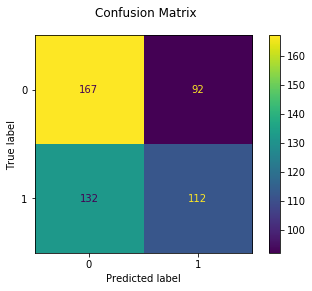

In [17]:
print("Classification report for logistic regression %s:\n%s\n"
      % (lgr, metrics.classification_report(y_test, lda_prediction)))
print("")
print("TRAIN SET")
print("accuracy is {}".format(metrics.accuracy_score(y_train,lgr.predict(X_train_lda))))
print("error is {}".format(1-metrics.accuracy_score(y_train,lgr.predict(X_train_lda))))
print("")
print("TEST SET")
print("accuracy is {}".format(metrics.accuracy_score(y_test,lda_prediction)))
print("error is {}".format(1-metrics.accuracy_score(y_test,lda_prediction)))
print("")
disp = metrics.plot_confusion_matrix(lgr, X_test_lda, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

<b>Model interpretation:</b> The difference between this model and the logistic regression explained above is data, after being transformed to numerical format, have to go under another transformation called LDA. LDA process 'rotates' the orginal coordinate to maximize the difference between classes as a way to improve the accuracy of classification. After the coordinate rotation, data will be mapped with new values corresponding to their position in the new coordinate. Then these new values will be used to train a logistic regression model. The additional data transformation using LDA, however, decreases the accuracy of the classification on test set to 0.55.

# PCA

In [18]:
#fit an transform training data using PCA process
pca = PCA(n_components=10, random_state=0)
X_train_pca = pca.fit_transform(X_train)

In [19]:
lgr.fit(X_train_pca,y_train)

LogisticRegression()

In [20]:
#transform test data and make prediction
X_test_pca = pca.transform(X_test)
pca_prediction = lgr.predict(X_test_pca)

Classification report for logistic regression LogisticRegression():
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       259
           1       0.59      0.56      0.58       244

    accuracy                           0.60       503
   macro avg       0.60      0.60      0.60       503
weighted avg       0.60      0.60      0.60       503



TRAIN SET
accuracy is 0.6480836236933798
error is 0.3519163763066202

TEST SET
accuracy is 0.6003976143141153
error is 0.3996023856858847

Confusion matrix:
[[166  93]
 [108 136]]


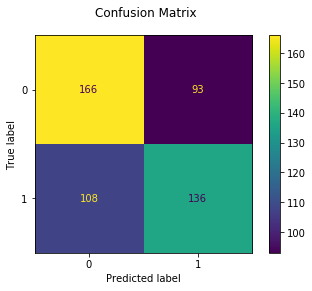

In [21]:
print("Classification report for logistic regression %s:\n%s\n"
      % (lgr, metrics.classification_report(y_test, pca_prediction)))
print("")
print("TRAIN SET")
print("accuracy is {}".format(metrics.accuracy_score(y_train,lgr.predict(X_train_pca))))
print("error is {}".format(1-metrics.accuracy_score(y_train,lgr.predict(X_train_pca))))
print("")
print("TEST SET")
print("accuracy is {}".format(metrics.accuracy_score(y_test,pca_prediction)))
print("error is {}".format(1-metrics.accuracy_score(y_test,pca_prediction)))
print("")

disp = metrics.plot_confusion_matrix(lgr, X_test_pca, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

<b>Model interpretation:</b> Similarly to LDA model above, data in this PCA model, after being transformed to numerical format, have to go under another transformation. Also, PCA rotates the original coordinate, like LDA, but to maximize variance. The major difference between PCA and LDA processes is PCA simplifies data from 14700 variables to n most powerful variables for the classification purpose (n is a paramenter of PCA process and is 10 in this case). After PCA transformation, the simplified data will be used to train logistic regression model. This model yields the best accuracy on test set, 0.6 (I rerun the code many times and PCA model always performed best). The reason is that PCA model ingores noises caused by unimportant variables in inputs (by eliminating such variables out of the training process). As a result, its prediction becomes more accurate.

# Conclusion

I would prefer using PCA model over the others because 
- the higher accuracy 
- it takes less computation power to train and to predict (way fewer predictors in inputs)
- the simplification of inputs (having fewer variables) makes it more intuitive and easier to present to other people, especially who dont have machine learning background